# Importing Library

In [3]:
import pandas as pd
import os

# Importing Data

In [6]:
# Import Data By Reading CSV
df = pd.read_csv('health_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# Importing 
# Read JSON
# Read Dictionary data = {'nama':[]}

# Data Manipulation Language

In [10]:
# Data Frame vs Series

In [32]:
# Comparing Series
type(df['id'])

pandas.core.series.Series

In [33]:
type(df)

pandas.core.frame.DataFrame

<Axes: >

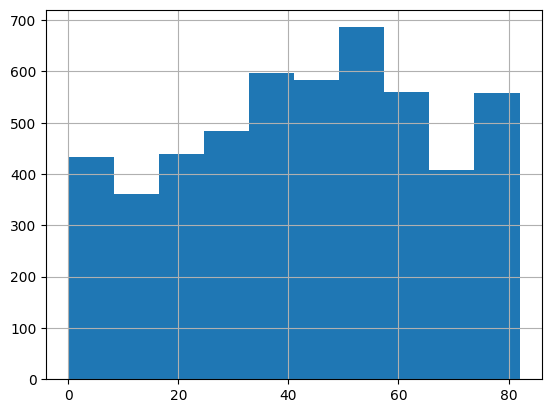

In [34]:
df['age']

In [15]:
# Selecting
df[['id', 'hypertension', 'work_type', 'age']]

,id,hypertension,work_type,age
0,9046,0,Private,67.0
1,51676,0,Self-employed,61.0
2,31112,0,Private,80.0
3,60182,0,Private,49.0
4,1665,1,Self-employed,79.0
...,...,...,...,...
5105,18234,1,Private,80.0
5106,44873,0,Self-employed,81.0
5107,19723,0,Self-employed,35.0
5108,37544,0,Private,51.0


In [17]:
# Filter
mask = df['age'] > 50
mask2 = df['gender'] == 'Male'

df[mask & mask2]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5092,56799,Male,76.0,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5096,41512,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [23]:
# Aggeragate
df.groupby('gender')[['hypertension']].mean()

,hypertension
gender,
Female,0.092184
Male,0.104965
Other,0.000000


In [24]:
# Aggeragate
df.groupby('gender')[['gender']].count()

,gender
gender,
Female,2994
Male,2115
Other,1


In [25]:
# Combining Agg vs Filter
mask = df['Residence_type'] == 'Urban'
df[mask].groupby('gender')[['hypertension']].mean()

,hypertension
gender,
Female,0.094179
Male,0.096532


# Using Apply Function

In [35]:
# Create Segment Age

<Axes: >

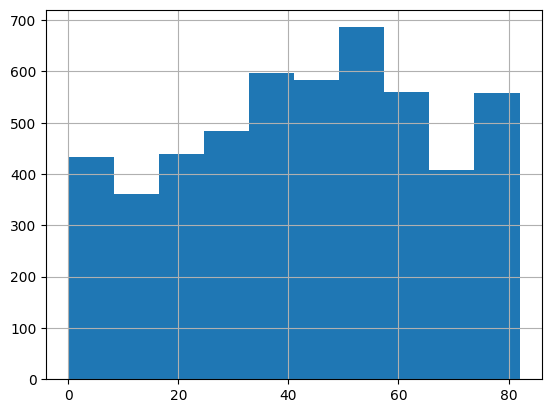

In [36]:
df['age'].hist()

In [47]:
def segment_age(value):
    if value > 80:
        segment = '04. > 80 years'
    elif value > 60:
        segment = '03. 60 - 80 years'
    elif value > 40:
        segment = '02. 40 - 60 years'
    elif value > 20:
        segment = '01. 20 - 40 years'
    else:
        segment = '00. < 20 years'
    return segment

segment_age(10)

'00. < 20 years'

In [48]:
column = ['id', 'age', 'segment_age']
df['segment_age'] = df['age'].apply(segment_age)
df[column]

,id,age,segment_age
0,9046,67.0,03. 60 - 80 years
1,51676,61.0,03. 60 - 80 years
2,31112,80.0,03. 60 - 80 years
3,60182,49.0,02. 40 - 60 years
4,1665,79.0,03. 60 - 80 years
...,...,...,...
5105,18234,80.0,03. 60 - 80 years
5106,44873,81.0,04. > 80 years
5107,19723,35.0,01. 20 - 40 years
5108,37544,51.0,02. 40 - 60 years


In [49]:
df[column].groupby('segment_age')[['id']].count()

,id
segment_age,
00. < 20 years,1025
01. 20 - 40 years,1219
02. 40 - 60 years,1562
03. 60 - 80 years,1188
04. > 80 years,116


In [ ]:
df